In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("GUIDE_Train.csv", nrows=10000, low_memory=False)


In [3]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,687194770257,75,394228,871699,2024-06-11T16:43:21.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9996,730144442453,49,29149,18644,2024-06-07T06:51:11.000Z,1,1,InitialAccess,T1566.002,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9997,154618823286,17,56608,133226,2024-06-07T23:48:32.000Z,20,29882,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9998,120259085306,408,201579,1372581,2024-06-05T18:43:59.000Z,81,12372,SuspiciousActivity,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


Remove above 50% of NULL columns


In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Id                  10000 non-null  int64              
 1   OrgId               10000 non-null  int64              
 2   IncidentId          10000 non-null  int64              
 3   AlertId             10000 non-null  int64              
 4   Timestamp           10000 non-null  datetime64[ns, UTC]
 5   DetectorId          10000 non-null  int64              
 6   AlertTitle          10000 non-null  int64              
 7   Category            10000 non-null  object             
 8   MitreTechniques     4201 non-null   object             
 9   IncidentGrade       9947 non-null   object             
 10  ActionGrouped       59 non-null     object             
 11  ActionGranular      59 non-null     object             
 12  EntityType          10000 non-nul

In [32]:
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)
removed_columns = df.columns[df.isnull().sum() > threshold]

In [31]:
df_cleaned

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Hour,DayOfWeek,Month,Day
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,6,4,6,4
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,14,6,14
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,4,13,6,13
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,16,10,6,10
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,1,15,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,687194770257,75,394228,871699,2024-06-11 16:43:21+00:00,0,0,InitialAccess,FalsePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,16,11,6,11
9996,730144442453,49,29149,18644,2024-06-07 06:51:11+00:00,1,1,InitialAccess,TruePositive,User,Impacted,98799,138268,360606,160396,45848,53590,43569,41163,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,6,7,6,7
9997,154618823286,17,56608,133226,2024-06-07 23:48:32+00:00,20,29882,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,2450,3209,2424,2567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,23,7,6,7
9998,120259085306,408,201579,1372581,2024-06-05 18:43:59+00:00,81,12372,SuspiciousActivity,FalsePositive,CloudApplication,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,8,8,881,289573,117668,3586,5,66,242,1445,10630,18,5,6,5


In [8]:
removed_columns

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Id                  10000 non-null  int64              
 1   OrgId               10000 non-null  int64              
 2   IncidentId          10000 non-null  int64              
 3   AlertId             10000 non-null  int64              
 4   Timestamp           10000 non-null  datetime64[ns, UTC]
 5   DetectorId          10000 non-null  int64              
 6   AlertTitle          10000 non-null  int64              
 7   Category            10000 non-null  object             
 8   IncidentGrade       9947 non-null   object             
 9   EntityType          10000 non-null  object             
 10  EvidenceRole        10000 non-null  object             
 11  DeviceId            10000 non-null  int64              
 12  Sha256              10000 non-nul

In [10]:
# Move 'IncidentGrade' to the last column
incident_column = df_cleaned.pop('IncidentGrade')  # Remove 'IncidentGrade' column from the DataFrame
df_cleaned['IncidentGrade'] = incident_column  # Add 'IncidentGrade' as the last column

# Check the new column order
print(df_cleaned.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Hour', 'DayOfWeek', 'Month', 'IncidentGrade'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_13604\1190107004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['IncidentGrade'] = incident_column  # Add 'IncidentGrade' as the last column


In [11]:
import pandas as pd

# Set the display width to show more columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width to a larger number

# Display DataFrame info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Id                  10000 non-null  int64              
 1   OrgId               10000 non-null  int64              
 2   IncidentId          10000 non-null  int64              
 3   AlertId             10000 non-null  int64              
 4   Timestamp           10000 non-null  datetime64[ns, UTC]
 5   DetectorId          10000 non-null  int64              
 6   AlertTitle          10000 non-null  int64              
 7   Category            10000 non-null  object             
 8   EntityType          10000 non-null  object             
 9   EvidenceRole        10000 non-null  object             
 10  DeviceId            10000 non-null  int64              
 11  Sha256              10000 non-null  int64              
 12  IpAddress           10000 non-nul

In [12]:
df["IncidentGrade"].value_counts()

IncidentGrade
BenignPositive    4391
TruePositive      3446
FalsePositive     2110
Name: count, dtype: int64

In [13]:
# df_cleaned["IncidentGrade"]=df_cleaned["IncidentGrade"].fillna(df_cleaned["IncidentGrade"].mode()[0])
# Fill missing values in 'IncidentGrade' with the most frequent value
most_frequent_value = df_cleaned['IncidentGrade'].mode()[0]
df_cleaned.loc[:, 'IncidentGrade'] = df_cleaned['IncidentGrade'].fillna(most_frequent_value)


In [14]:
df_cleaned["IncidentGrade"].value_counts()

IncidentGrade
BenignPositive    4444
TruePositive      3446
FalsePositive     2110
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Display the DataFrame with encoded values
print(df_cleaned)

                 Id  OrgId  IncidentId  AlertId                 Timestamp  DetectorId  AlertTitle  Category  EntityType  EvidenceRole  DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  AccountName  DeviceName  NetworkMessageId  RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId  FileName  FolderPath  ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  Hour  DayOfWeek  Month  IncidentGrade
0      180388628218      0         612   123247 2024-06-04 06:05:15+00:00           7           6         9           7             1     98799  138268         27  160396      441377      673934           425863       453297      153085            529644         1631                635                860           2251             3421                 881    289573      117668            3586         5         66           31      6      3     6          1      6              2
1      455266534868     88        

C:\Users\hp\AppData\Local\Temp\ipykernel_13604\339398153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_13604\339398153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_13604\339398153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Id                  10000 non-null  int64              
 1   OrgId               10000 non-null  int64              
 2   IncidentId          10000 non-null  int64              
 3   AlertId             10000 non-null  int64              
 4   Timestamp           10000 non-null  datetime64[ns, UTC]
 5   DetectorId          10000 non-null  int64              
 6   AlertTitle          10000 non-null  int64              
 7   Category            10000 non-null  int64              
 8   EntityType          10000 non-null  int64              
 9   EvidenceRole        10000 non-null  int64              
 10  DeviceId            10000 non-null  int64              
 11  Sha256              10000 non-null  int64              
 12  IpAddress           10000 non-nul

Outlier detection


In [17]:
import pandas as pd
import numpy as np

# Load your data (assuming it's already in a DataFrame df)

# Define a function to detect outliers using IQR
def detect_outliers_iqr(df_cleaned):
    outliers = pd.DataFrame()
    for column in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)].index
        outliers = pd.concat([outliers, df_cleaned.loc[outlier_indices]])
    return outliers.drop_duplicates()

# Detect outliers
outliers = detect_outliers_iqr(df_cleaned)

print("Number of outliers detected:", len(outliers))

df_no_outliers = df_cleaned.drop(outliers.index)

Number of outliers detected: 9105


In [18]:
df_no_outliers

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Hour,DayOfWeek,Month,IncidentGrade
24,824633723860,75,478,939479,2024-06-03 14:37:16+00:00,4,3,9,3,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,14,0,6,2
27,489626273557,0,211,160158,2024-06-11 08:26:58+00:00,0,0,9,3,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,8,1,6,2
42,231928235439,88,26726,1114326,2024-06-10 01:50:27+00:00,58,43,6,10,0,98799,138268,360606,160396,441377,26709,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,1,0,6,1
49,627065226947,0,375,169963,2024-06-10 05:29:36+00:00,0,0,9,3,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,5,0,6,2
50,249108107265,108,144844,118616,2024-06-13 15:44:04+00:00,6,5,9,9,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,15,3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,1262720389131,108,106863,137177,2024-06-15 02:56:00+00:00,1,1,9,9,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2,5,6,0
9938,111669152214,5,31,972007,2024-06-10 16:39:57+00:00,0,0,9,4,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,16,0,6,2
9972,1202590843691,279,140453,826285,2024-06-06 03:01:14+00:00,0,0,9,4,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,3,6,1
9980,1468878816981,0,134,519852,2024-06-09 00:54:52+00:00,0,0,9,3,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,0,6,6,2


In [19]:
outliers

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Hour,DayOfWeek,Month,IncidentGrade
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,9,18,1,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,4,3,6,1
6,163208760309,522,566,705663,2024-06-14 23:19:45+00:00,2,2,1,18,1,98799,138268,360606,3306,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,23,4,6,0
11,103079219463,597,159032,1380964,2024-06-07 07:08:22+00:00,9,373,5,2,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,3,3,881,289573,117668,3586,5,66,242,1445,10630,7,4,6,2
15,781684051738,2119,6622,23284,2024-06-10 10:28:29+00:00,13,11,9,10,1,98799,138268,360606,160396,441377,160691,425863,453297,153085,1842,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,10,0,6,0
19,1340029797776,592,53360,215453,2024-06-13 13:21:39+00:00,933,9966,6,5,0,98799,10713,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,12633,3509,3586,5,66,242,1445,10630,13,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,103079218502,2,7136,8235,2024-06-11 19:25:54+00:00,18,14,6,5,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,285302,12714,3586,5,66,242,1445,10630,19,1,6,0
8916,592705488171,44,10287,11831,2024-06-12 19:00:00+00:00,50,36,6,5,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,166897,0,3586,5,66,242,1445,10630,19,2,6,0
9569,1417339210699,124,99139,566816,2024-06-07 07:16:15+00:00,9,64,5,5,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,62,117668,3586,5,66,242,1445,10630,7,4,6,1
9587,94489284077,2,3529,8127,2024-06-06 19:13:44+00:00,42,27,6,5,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,53733,17596,3586,5,66,242,1445,10630,19,3,6,0


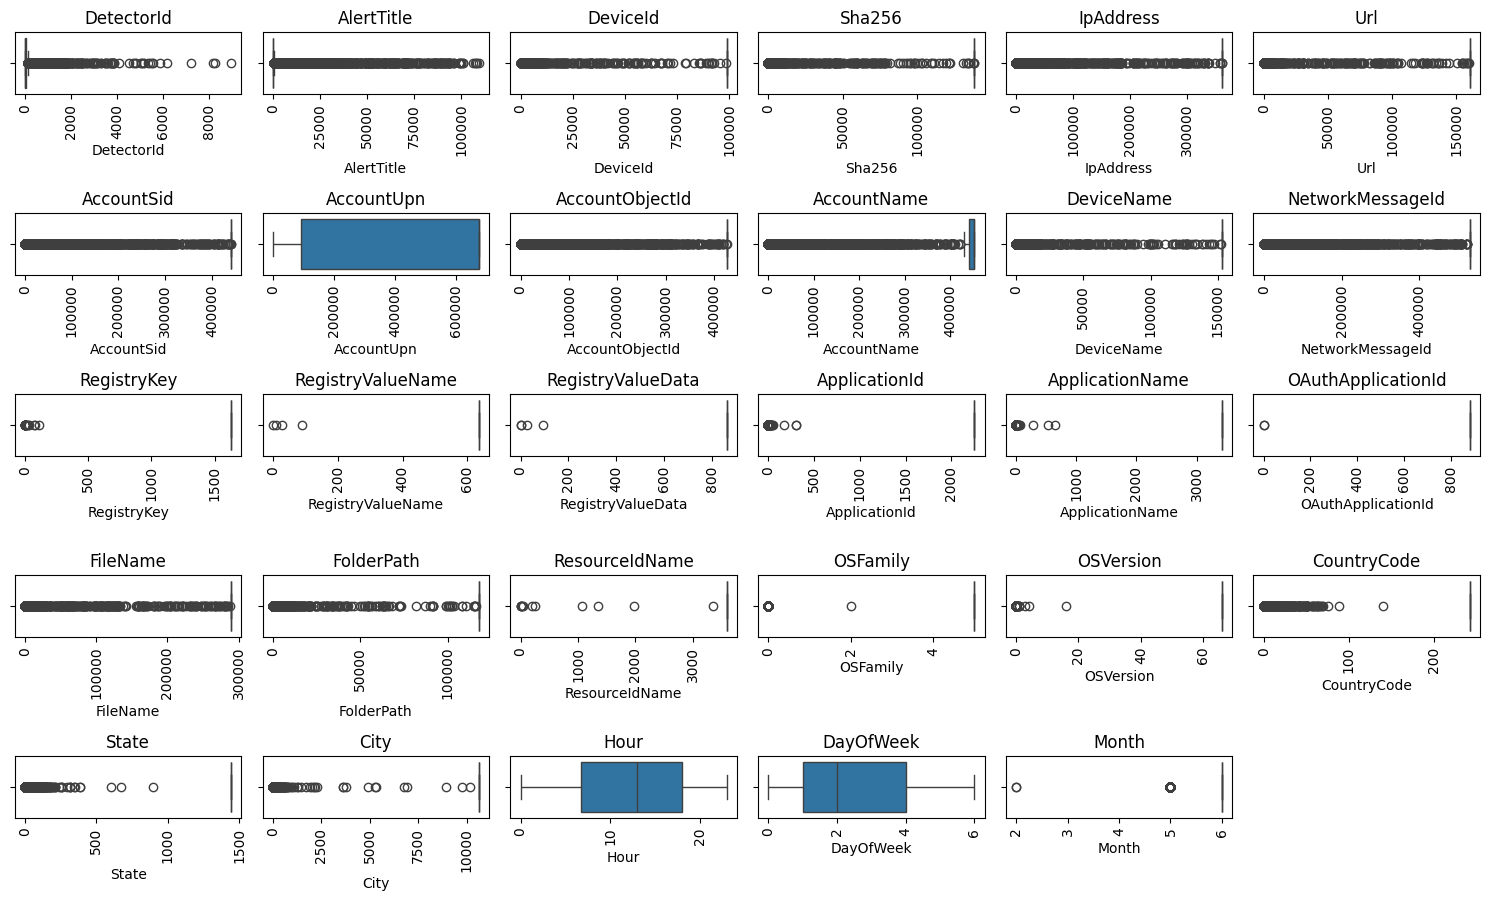

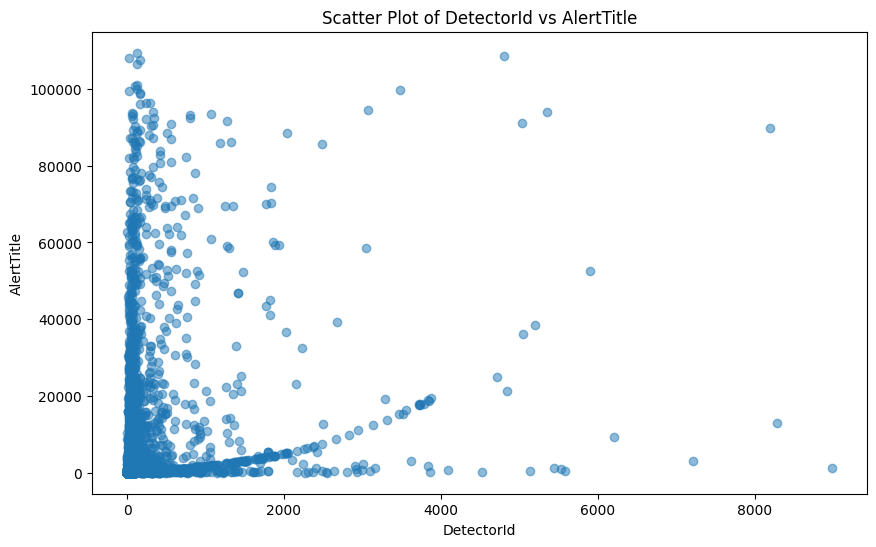

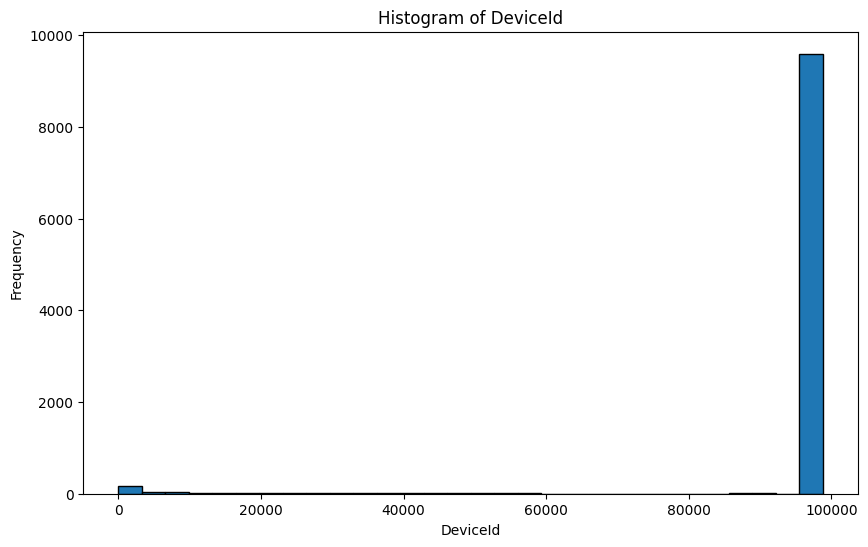

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your DataFrame
# df = pd.read_csv('your_data.csv')  # Example if you're reading from a CSV

# Example DataFrame with relevant columns
# Here, `df` is assumed to be your DataFrame containing numerical columns

# Numerical columns for visualization (replace with actual column names)
numerical_columns = [
    'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
    'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
    'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId',
    'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
    'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Hour', 'DayOfWeek', 'Month'
]

# Box Plot for each numerical column
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns):
    plt.subplot(7, 6, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter Plot (choose two numerical columns for demonstration)
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['DetectorId'], df_cleaned['AlertTitle'], alpha=0.5)
plt.title('Scatter Plot of DetectorId vs AlertTitle')
plt.xlabel('DetectorId')
plt.ylabel('AlertTitle')
plt.show()

# Histogram for a specific numerical column (e.g., 'DeviceId')
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['DeviceId'], bins=30, edgecolor='black')
plt.title('Histogram of DeviceId')
plt.xlabel('DeviceId')
plt.ylabel('Frequency')
plt.show()


In [21]:
df_cleaned

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Hour,DayOfWeek,Month,IncidentGrade
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,9,7,1,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,6,1,6,2
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,6,19,0,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,4,6,1
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,9,18,1,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,4,3,6,1
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,1,18,1,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,16,0,6,0
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,5,19,0,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,1,5,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,687194770257,75,394228,871699,2024-06-11 16:43:21+00:00,0,0,9,3,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,16,1,6,1
9996,730144442453,49,29149,18644,2024-06-07 06:51:11+00:00,1,1,9,19,0,98799,138268,360606,160396,45848,53590,43569,41163,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,6,4,6,2
9997,154618823286,17,56608,133226,2024-06-07 23:48:32+00:00,20,29882,6,19,0,98799,138268,360606,160396,2450,3209,2424,2567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,23,4,6,1
9998,120259085306,408,201579,1372581,2024-06-05 18:43:59+00:00,81,12372,15,2,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,8,8,881,289573,117668,3586,5,66,242,1445,10630,18,2,6,1


In [22]:
# Feature engineering: Convert Timestamp to numeric features (e.g., Unix timestamp)
df_cleaned['Timestamp'] = df_cleaned['Timestamp'].astype(int) / 10**9  # Convert to seconds


C:\Users\hp\AppData\Local\Temp\ipykernel_13604\627399504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Timestamp'] = df_cleaned['Timestamp'].astype(int) / 10**9  # Convert to seconds


In [23]:
from sklearn.model_selection import train_test_split


# Prepare feature matrix (X) and target vector (y)
X = df_cleaned.drop('IncidentGrade', axis=1)  # Features
y = df_cleaned['IncidentGrade']               # Target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set:")
print(X_train.shape)
print(y_train.shape)

print("\nTest set:")
print(X_test.shape)
print(y_test.shape)

Training set:
(8000, 37)
(8000,)

Test set:
(2000, 37)
(2000,)


Logistice Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[624   0 253]
 [291   0 149]
 [278   0 405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       877
           1       0.00      0.00      0.00       440
           2       0.50      0.59      0.54       683

    accuracy                           0.51      2000
   macro avg       0.34      0.43      0.38      2000
weighted avg       0.40      0.51      0.45      2000



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Grid Search

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)

# Step 4: Define the hyperparameter grid for tuning
param_grid = {
    'C': [1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Optimization algorithms
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type (penalty)
}

# Step 5: Perform Grid Search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Best hyperparameters from Grid Search
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Predict on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

NameError: name 'X_train' is not defined

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define the parameter grid
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(random_search.best_params_)

print("\nBest Score:")
print(random_search.best_score_)

# Predict with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[696 107  74]
 [ 72 331  37]
 [ 69  40 574]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       877
           1       0.69      0.75      0.72       440
           2       0.84      0.84      0.84       683

    accuracy                           0.80      2000
   macro avg       0.79      0.80      0.79      2000
weighted avg       0.80      0.80      0.80      2000



In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [  'sqrt', 'log2']
}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Score:")
print(grid_search.best_score_)

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Score:
0.747375

Confusion Matrix:
[[751  67  59]
 [169 247  24]
 [178  29 476]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       877
           1       0.72      0.56      0.63       440
           2       0.85      0.70      0.77       683

    accuracy                           0.74      2000
   macro avg       0.75      0.70      0.72      2000
weighted avg       0.75      0.74      0.73      2000



In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [  'sqrt', 'log2']
}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(random_search.best_params_)

print("\nBest Score:")
print(random_search.best_score_)

# Predict with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}

Best Score:
0.742125

Confusion Matrix:
[[706  67 104]
 [129 255  56]
 [140  31 512]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       877
           1       0.72      0.58      0.64       440
           2       0.76      0.75      0.76       683

    accuracy                           0.74      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.74      0.74      0.73      2000



Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[817  20  40]
 [111 308  21]
 [144  10 529]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       877
           1       0.91      0.70      0.79       440
           2       0.90      0.77      0.83       683

    accuracy                           0.83      2000
   macro avg       0.86      0.80      0.82      2000
weighted avg       0.84      0.83      0.83      2000



In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [ 100, 200, 300],
    'max_depth': [ 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Score:")
print(grid_search.best_score_)

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': list(range(10, 50, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                    n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, 
                                    random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(random_search.best_params_)

print("\nBest Score:")
print(random_search.best_score_)

# Predict with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[817  24  36]
 [177 243  20]
 [180  11 492]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       877
           1       0.87      0.55      0.68       440
           2       0.90      0.72      0.80       683

    accuracy                           0.78      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.80      0.78      0.77      2000



In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [ 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Score:")
print(grid_search.best_score_)

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the neural network model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[859   4  14]
 [429   6   5]
 [673   2   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.98      0.61       877
           1       0.50      0.01      0.03       440
           2       0.30      0.01      0.02       683

    accuracy                           0.44      2000
   macro avg       0.41      0.33      0.22      2000
weighted avg       0.40      0.44      0.28      2000



In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[877   0   0]
 [440   0   0]
 [683   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       877
           1       0.00      0.00      0.00       440
           2       0.00      0.00      0.00       683

    accuracy                           0.44      2000
   macro avg       0.15      0.33      0.20      2000
weighted avg       0.19      0.44      0.27      2000



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f